ADVANCE MACHINE LEARNING

LAB-5

PRANSHU PARATE

202211063

In [ ]:
#importing the packages
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
from jax.scipy.stats import beta, bernoulli

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.5 MB/s eta 0:00:00


In [ ]:
# Points where we evaluate the pdf
x = jnp.linspace(0.001, 0.999, 100)

The prior distribution represents our beliefs about the parameters before we have observed any data.

Prior: It specifies the hyperparameters of the beta prior distribution.

The likelihood function represents the probability of the observed data given the parameters.

Likelihood: It specifies the number of failures and successes in the observed data.

The posterior distribution, therefore, represents our updated beliefs about the parameters after we have seen the data.

Posterior: It specifies the hyperparameters of the beta posterior distruibution.

n_0 = number of successes.

n_1= number of failures.

"a" and "b", representing the parameters of the beta distribution.

In [ ]:
# Forms graph given the parameters of the prior, likelihood and posterior:
#Function defining the beta pdf(probability density function) from JAX for prior and posterior distributions and likelihood function.

def make_graph(data, save_name):
    prior = beta.pdf(x, a=data["prior"]["a"], b=data["prior"]["b"])
    n_0 = data["likelihood"]["n_0"]
    n_1 = data["likelihood"]["n_1"]
    samples = jnp.concatenate([jnp.zeros(n_0), jnp.ones(n_1)])
    likelihood_function = jnp.vectorize(lambda p: jnp.exp(bernoulli.logpmf(samples, p).sum()))
    likelihood = likelihood_function(x)
    posterior = beta.pdf(x, a=data["posterior"]["a"], b=data["posterior"]["b"])

    fig, ax = plt.subplots()
    axt = ax.twinx()

    #plotting of prior distribution curve
    fig1 = ax.plot(
        x,
        prior,
        "k",
        label=f"prior Beta({data['prior']['a']}, {data['prior']['b']})",
        linewidth=2.0,
    )

    #plotting of likelihood function using a Bernoulli distribution 
    fig2 = axt.plot(x, likelihood, "r:", label=f"likelihood Bernoulli", linewidth=2.0)

    #plotting of posterior distribution curve
    fig3 = ax.plot(
        x,
        posterior,
        "b-.",
        label=f"posterior Beta({data['posterior']['a']}, {data['posterior']['b']})",
        linewidth=2.0,
    )

    #combining all the three figures
    fig_list = fig1 + fig2 + fig3

    labels = [fig.get_label() for fig in fig_list]
    ax.legend(fig_list, labels, loc="upper left", shadow=True)
    axt.set_ylabel("Likelihood")
    ax.set_ylabel("Prior/Posterior")
    ax.set_title(f"$N_0$:{n_0}, $N_1$:{n_1}")
    pml.savefig(save_name)

In the below graph:

Black Line represents prior Distribution.

Red Dotted Line representats Likelihood Function.

Blue Dashed Line represents Posterior Distribution.

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


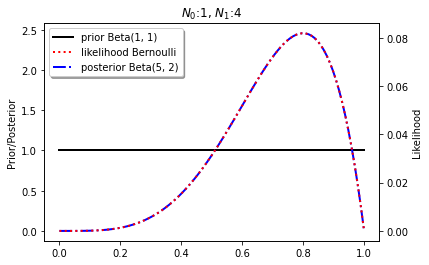

In [ ]:
#It represents graph of uniform distribution for small data sample
data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

plt.show()

In the above graph posterior has the exactly the same shape as the likelihood, since the prior was 'uninformative' for small data sample.

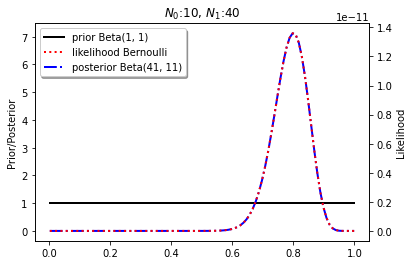

In [ ]:
#It represents graph of uniform distribution for large data sample
data2 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 41, "b": 11},
}
make_graph(data2, "betaPostUninfLargeSample.pdf")

plt.show()


In the above graph posterior has the exactly the same shape as the likelihood, since the prior was 'uninformative' for large data sample.

The concept of an uninformative prior is subjective and context-dependent, and different statisticians may have different opinions on what constitutes an appropriate uninformative prior for a given problem.

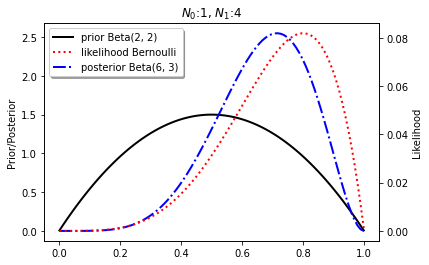

In [ ]:
data3 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data3, "betaPostInfSmallSample.pdf")

plt.show()

In the above graph, there is a weak  preference for value of theta is 0.5 where posterior is a 'compromise' between prior and likelihood function for small data sample.

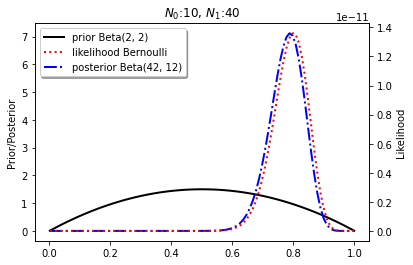

In [ ]:
data4 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 42, "b": 12},
}
make_graph(data4, "betaPostInfLargeSample.pdf")


plt.show()

In the above graph, there is a weak  preference for value of theta is 0.5 where posterior is a 'compromise' between prior and likelihood function for large data sample.

In the case of a small data sample, the likelihood function may not provide enough information to fully update our beliefs about the parameter(s). In such cases, the posterior distribution can be seen as a compromise between the prior and the likelihood function, where the prior provides some guidance and the likelihood function provides some data-driven information.

In cases where we have strong prior beliefs, the prior may dominate the posterior distribution, while in cases where the data provide strong evidence, the likelihood function may dominate.

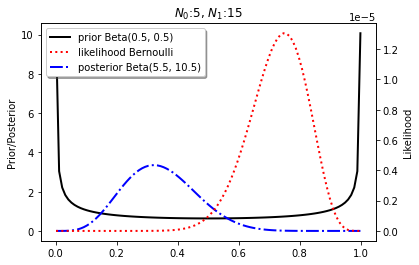

In [ ]:
data5 = {
    "prior": {"a": 0.5, "b": 0.5},
    "likelihood": {"n_0": 5, "n_1": 15},
    "posterior": {"a": 5.5, "b": 10.5},
}
make_graph(data5, "betaPostMoreUncertainty.pdf")

In the above graph, there is an uncertainity in Beta Prior distribution in small data sample.

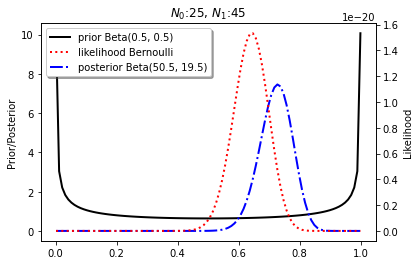

In [ ]:
data5 = {
    "prior": {"a": 0.5, "b": 0.5},
    "likelihood": {"n_0": 25, "n_1": 45},
    "posterior": {"a": 50.5, "b": 19.5},
}
make_graph(data5, "betaPostMoreUncertainty.pdf")

In the above graph, there is an uncertainity in Beta Prior distribution in large data sample.

Uncertainity goes down at the rate of 1/square root of N where N is the sample size. Uncertainity (variance) is maximised when the value of theta is equal to 0.5 and minimised if its value is close 0 and 1.